In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install nfstream
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tabulate import tabulate

import nfstream
print(nfstream.__version__)
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
6.5.1


In [3]:
from nfstream import NFStreamer, NFPlugin
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
link = '/content/drive/MyDrive/namp_combined_traffic_10_25.pcap'
my_streamer = NFStreamer(source=link,
                         statistical_analysis=True)

In [6]:
df = my_streamer.to_pandas()

In [7]:
df.head()

,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,protocol,ip_version,vlan_id,tunnel_id,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_first_seen_ms,src2dst_last_seen_ms,src2dst_duration_ms,src2dst_packets,src2dst_bytes,dst2src_first_seen_ms,dst2src_last_seen_ms,dst2src_duration_ms,dst2src_packets,dst2src_bytes,bidirectional_min_ps,bidirectional_mean_ps,bidirectional_stddev_ps,bidirectional_max_ps,src2dst_min_ps,src2dst_mean_ps,src2dst_stddev_ps,src2dst_max_ps,dst2src_min_ps,dst2src_mean_ps,dst2src_stddev_ps,dst2src_max_ps,bidirectional_min_piat_ms,bidirectional_mean_piat_ms,bidirectional_stddev_piat_ms,bidirectional_max_piat_ms,src2dst_min_piat_ms,src2dst_mean_piat_ms,src2dst_stddev_piat_ms,src2dst_max_piat_ms,dst2src_min_piat_ms,dst2src_mean_piat_ms,dst2src_stddev_piat_ms,dst2src_max_piat_ms,bidirectional_syn_packets,bidirectional_cwr_packets,bidirectional_ece_packets,bidirectional_urg_packets,bidirectional_ack_packets,bidirectional_psh_packets,bidirectional_rst_packets,bidirectional_fin_packets,src2dst_syn_packets,src2dst_cwr_packets,src2dst_ece_packets,src2dst_urg_packets,src2dst_ack_packets,src2dst_psh_packets,src2dst_rst_packets,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type
0,0,0,10.0.0.21,30:e4:db:2b:cc:a2,30:e4:db,38212,172.16.1.20,44:1e:a1:61:cf:d3,44:1e:a1,199,6,4,0,0,1635172393015,1635172393015,0,2,148,1635172393015,1635172393015,0,2,148,0,0,0,0,0,74,74.0,0.0,74,74,74.0,0.0,74,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN
1,1,0,10.0.0.21,30:e4:db:2b:cc:a2,30:e4:db,35154,172.16.1.20,44:1e:a1:61:cf:d3,44:1e:a1,3325,6,4,0,0,1635172394221,1635172394221,0,2,148,1635172394221,1635172394221,0,2,148,0,0,0,0,0,74,74.0,0.0,74,74,74.0,0.0,74,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN
2,2,0,10.0.0.21,30:e4:db:2b:cc:a2,30:e4:db,46540,172.16.1.20,44:1e:a1:61:cf:d3,44:1e:a1,17988,6,4,0,0,1635172394239,1635172394239,0,2,148,1635172394239,1635172394239,0,2,148,0,0,0,0,0,74,74.0,0.0,74,74,74.0,0.0,74,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN
3,3,0,10.0.0.21,30:e4:db:2b:cc:a2,30:e4:db,44666,172.16.1.20,44:1e:a1:61:cf:d3,44:1e:a1,1033,6,4,0,0,1635172394263,1635172394263,0,2,148,1635172394263,1635172394263,0,2,148,0,0,0,0,0,74,74.0,0.0,74,74,74.0,0.0,74,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN
4,4,0,10.0.0.21,30:e4:db:2b:cc:a2,30:e4:db,36566,172.16.1.20,44:1e:a1:61:cf:d3,44:1e:a1,1001,6,4,0,0,1635172394365,1635172394365,0,2,148,1635172394365,1635172394365,0,2,148,0,0,0,0,0,74,74.0,0.0,74,74,74.0,0.0,74,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN


In [8]:
def explore_dataset(data):
    """
    In explore_dataset function we are doing all the things that given below:
    - checking shape of dataset
    - checking null values 
    - checking overall information about dataset using info() method
    - checking dtypes of columns
    """
    print("="*100)
    print("\t\t\tEDA Dataset")
    print("="*100)
    
    print("Total Rows: {}".format(data.shape[0]))
    print("\nTotal Columns: {}".format(data.shape[1]))
    print("\nTotal Null Values: {}".format(data.isnull().sum().sum()))
    print(" ")
    print("\t\tOverall Information about Dataset\n")
    print(data.info())
    print(" ")
    print("\t\tDtype of all Columns\n")
    print(data.dtypes)

In [9]:
explore_dataset(df)

			EDA Dataset
Total Rows: 10006

Total Columns: 86

Total Null Values: 49979
 
		Overall Information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10006 entries, 0 to 10005
Data columns (total 86 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10006 non-null  int64  
 1   expiration_id                 10006 non-null  int64  
 2   src_ip                        10006 non-null  object 
 3   src_mac                       10006 non-null  object 
 4   src_oui                       10006 non-null  object 
 5   src_port                      10006 non-null  int64  
 6   dst_ip                        10006 non-null  object 
 7   dst_mac                       10006 non-null  object 
 8   dst_oui                       10006 non-null  object 
 9   dst_port                      10006 non-null  int64  
 10  protocol                      10006 non-null  int64  
 11  ip

In [10]:
def drop_irrelevent_features(df, columns):
  df = df.drop(columns, axis = 1)
  return df

In [11]:
remove_f = ['id','src_ip','src_mac', 'src_oui', 'dst_ip','dst_mac','dst_oui']
df = drop_irrelevent_features(df, remove_f)

In [12]:
df['label'] = np.where(((df['src2dst_rst_packets']>=1) | (df['dst2src_rst_packets']>=1)) & ((df['application_name']=='Unknown')),1,0)

In [13]:
df['label'].value_counts()

0    9962
1      44
Name: label, dtype: int64

In [14]:
''' 
lets try to check the percentage of missing values,unique values,percentage of one catagory values 
and type against each column.

'''
stats = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', '% MissingValues', '% highOneCategoricalValues', 'type'])
df_ = stats_df.sort_values('% MissingValues', ascending=False)
print(tabulate(df_, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------+-----------------+-------------------+------------------------------+---------+
|    | Feature                      |   Unique_values |   % MissingValues |   % highOneCategoricalValues | type    |
|----+------------------------------+-----------------+-------------------+------------------------------+---------|
| 78 | content_type                 |               0 |          100      |                   100        | float64 |
| 77 | user_agent                   |               0 |          100      |                   100        | float64 |
| 76 | server_fingerprint           |               0 |          100      |                   100        | float64 |
| 75 | client_fingerprint           |               0 |          100      |                   100        | float64 |
| 74 | requested_server_name        |               9 |           99.4903 |                    99.4903   | object  |
|  0 | expiration_id                |               1 |         

In [15]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None, HUE=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=HUE,
        palette="Set2",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title('Distribution of mirai attacks in the dataset', fontsize=18)
    plt.show()  # show the plot

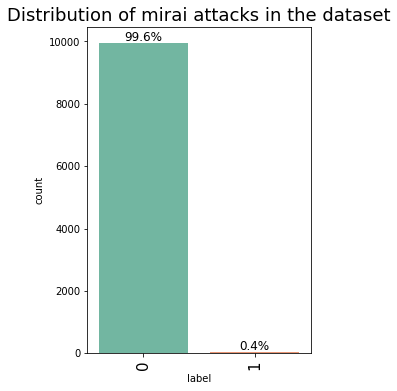

In [16]:
labeled_barplot(df,'label', perc=True)


In [17]:
def categroy_distribution(data, col, top=None):
    print("\t\t{} Distribution".format(col))
    print()
    perc = round(data[col].value_counts(normalize=True)[:top]*100,2)

    dataCat = perc.to_frame().reset_index().rename(columns={'index':'Category',
                                                          col:f'{col}Perc'})
    print(tabulate(dataCat, headers = 'keys', tablefmt = 'psql'))
    plt.figure(figsize=(7,7))
    fig = sns.countplot(x=col, data=data, color="g", order=data[col].value_counts().iloc[:top].index)
    for p in fig.patches:
        fig.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+10), size=15)
    plt.xticks(rotation=90)
    plt.show()

In [33]:
cols = ['protocol','src2dst_ack_packets', 'src2dst_psh_packets', 'src2dst_rst_packets',
       'src2dst_fin_packets', 'dst2src_syn_packets', 'dst2src_cwr_packets',
       'dst2src_ece_packets', 'dst2src_urg_packets', 'dst2src_ack_packets',
       'dst2src_psh_packets', 'dst2src_rst_packets', 'dst2src_fin_packets',
       'application_name', 'application_category_name',
       'application_is_guessed', 'application_confidence', 'label']

		protocol Distribution

+----+------------+----------------+
|    |   Category |   protocolPerc |
|----+------------+----------------|
|  0 |          6 |          79.53 |
|  1 |         17 |          20.46 |
|  2 |          1 |           0.01 |
+----+------------+----------------+


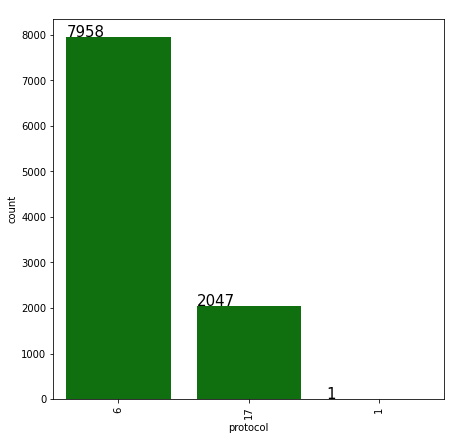

		src2dst_ack_packets Distribution

+----+------------+---------------------------+
|    |   Category |   src2dst_ack_packetsPerc |
|----+------------+---------------------------|
|  0 |          0 |                     99.34 |
|  1 |          4 |                      0.38 |
|  2 |          2 |                      0.28 |
+----+------------+---------------------------+


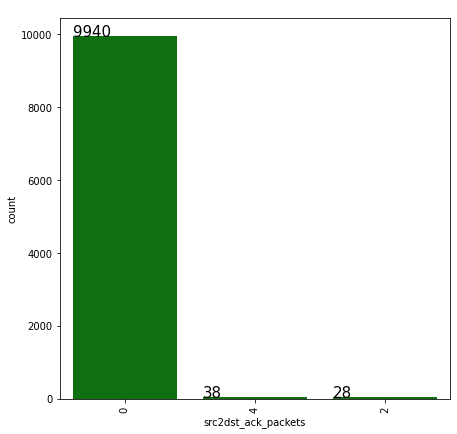

		src2dst_psh_packets Distribution

+----+------------+---------------------------+
|    |   Category |   src2dst_psh_packetsPerc |
|----+------------+---------------------------|
|  0 |          0 |                     99.99 |
|  1 |          2 |                      0.01 |
+----+------------+---------------------------+


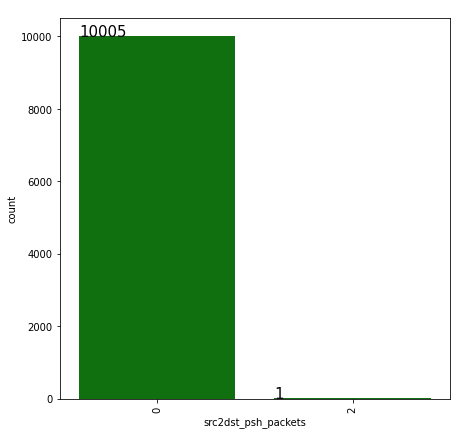

		src2dst_rst_packets Distribution

+----+------------+---------------------------+
|    |   Category |   src2dst_rst_packetsPerc |
|----+------------+---------------------------|
|  0 |          0 |                      99.2 |
|  1 |          2 |                       0.8 |
+----+------------+---------------------------+


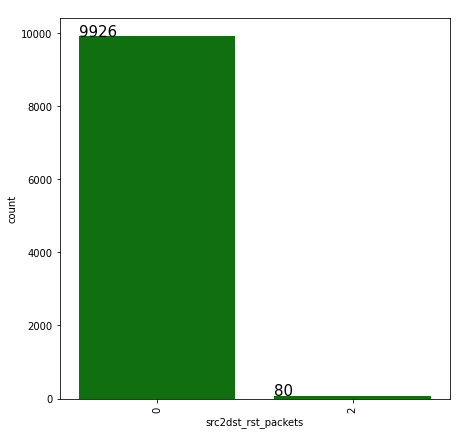

		src2dst_fin_packets Distribution

+----+------------+---------------------------+
|    |   Category |   src2dst_fin_packetsPerc |
|----+------------+---------------------------|
|  0 |          0 |                       100 |
+----+------------+---------------------------+


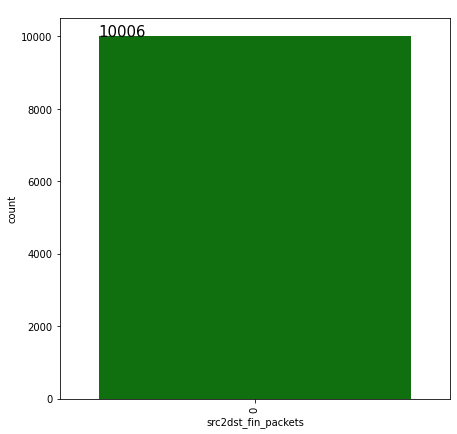

		dst2src_syn_packets Distribution

+----+------------+---------------------------+
|    |   Category |   dst2src_syn_packetsPerc |
|----+------------+---------------------------|
|  0 |          0 |                     98.91 |
|  1 |          2 |                      1.09 |
+----+------------+---------------------------+


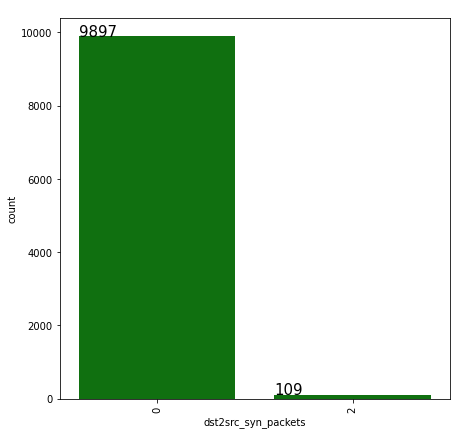

		dst2src_cwr_packets Distribution

+----+------------+---------------------------+
|    |   Category |   dst2src_cwr_packetsPerc |
|----+------------+---------------------------|
|  0 |          0 |                       100 |
+----+------------+---------------------------+


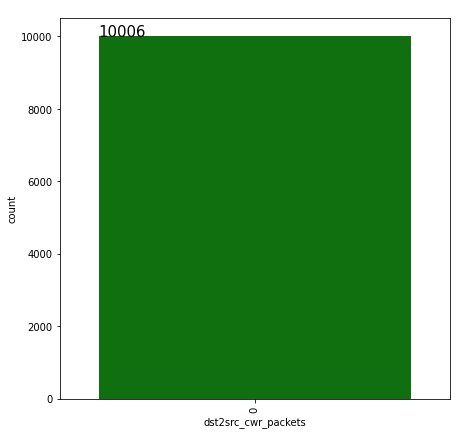

		dst2src_ece_packets Distribution

+----+------------+---------------------------+
|    |   Category |   dst2src_ece_packetsPerc |
|----+------------+---------------------------|
|  0 |          0 |                     99.99 |
|  1 |          2 |                      0.01 |
+----+------------+---------------------------+


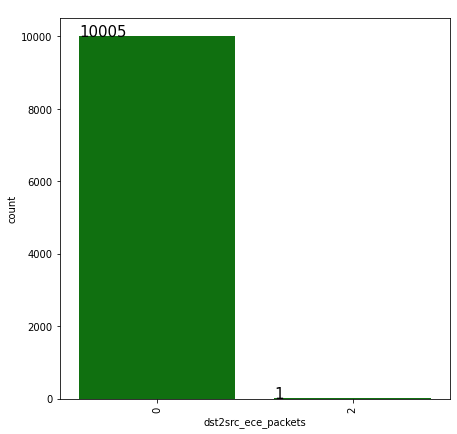

		dst2src_urg_packets Distribution

+----+------------+---------------------------+
|    |   Category |   dst2src_urg_packetsPerc |
|----+------------+---------------------------|
|  0 |          0 |                       100 |
+----+------------+---------------------------+


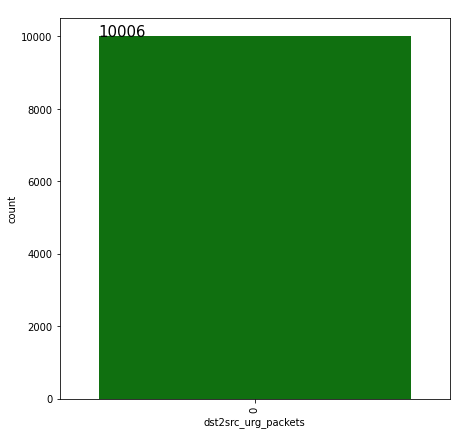

		dst2src_ack_packets Distribution

+----+------------+---------------------------+
|    |   Category |   dst2src_ack_packetsPerc |
|----+------------+---------------------------|
|  0 |          0 |                     99.06 |
|  1 |          2 |                      0.79 |
|  2 |          4 |                      0.15 |
+----+------------+---------------------------+


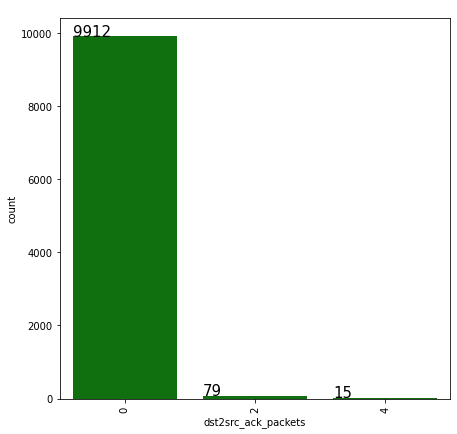

		dst2src_psh_packets Distribution

+----+------------+---------------------------+
|    |   Category |   dst2src_psh_packetsPerc |
|----+------------+---------------------------|
|  0 |          0 |                     99.99 |
|  1 |          2 |                      0.01 |
+----+------------+---------------------------+


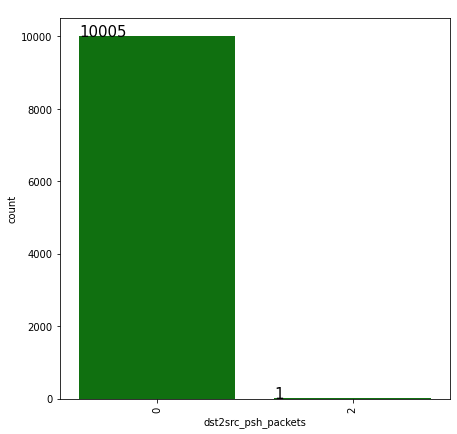

		dst2src_rst_packets Distribution

+----+------------+---------------------------+
|    |   Category |   dst2src_rst_packetsPerc |
|----+------------+---------------------------|
|  0 |          0 |                     99.71 |
|  1 |          2 |                      0.29 |
+----+------------+---------------------------+


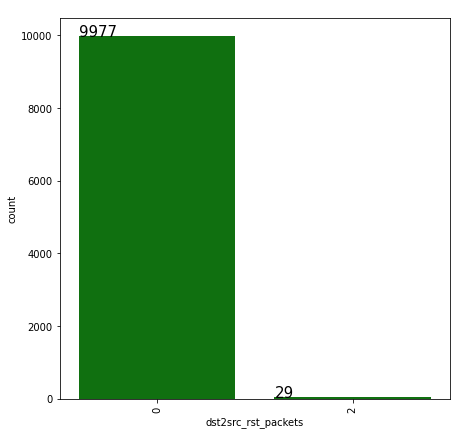

		dst2src_fin_packets Distribution

+----+------------+---------------------------+
|    |   Category |   dst2src_fin_packetsPerc |
|----+------------+---------------------------|
|  0 |          0 |                       100 |
+----+------------+---------------------------+


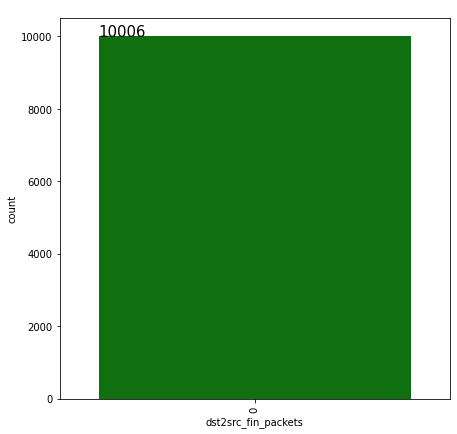

		application_name Distribution

+----+------------+------------------------+
|    | Category   |   application_namePerc |
|----+------------+------------------------|
|  0 | Unknown    |                  94.01 |
|  1 | DNS        |                   0.55 |
|  2 | VNC        |                   0.24 |
|  3 | HTTP       |                   0.19 |
|  4 | SIP        |                   0.18 |
|  5 | CiscoVPN   |                   0.18 |
|  6 | SMTPS      |                   0.16 |
|  7 | AJP        |                   0.16 |
|  8 | Whois-DAS  |                   0.16 |
|  9 | BGP        |                   0.16 |
+----+------------+------------------------+


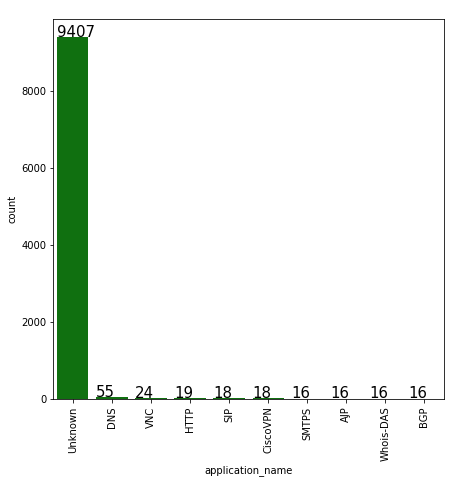

		application_category_name Distribution

+----+--------------+---------------------------------+
|    | Category     |   application_category_namePerc |
|----+--------------+---------------------------------|
|  0 | Unspecified  |                           94.01 |
|  1 | Network      |                            1.46 |
|  2 | Web          |                            0.77 |
|  3 | RemoteAccess |                            0.65 |
|  4 | Email        |                            0.56 |
|  5 | VoIP         |                            0.42 |
|  6 | Database     |                            0.4  |
|  7 | System       |                            0.38 |
|  8 | VPN          |                            0.3  |
|  9 | DataTransfer |                            0.28 |
+----+--------------+---------------------------------+


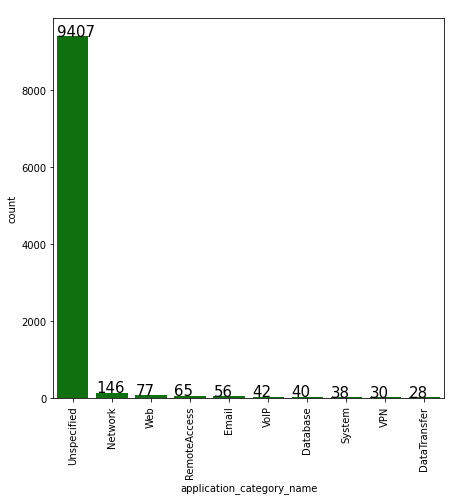

		application_is_guessed Distribution

+----+------------+------------------------------+
|    |   Category |   application_is_guessedPerc |
|----+------------+------------------------------|
|  0 |          0 |                        94.67 |
|  1 |          1 |                         5.33 |
+----+------------+------------------------------+


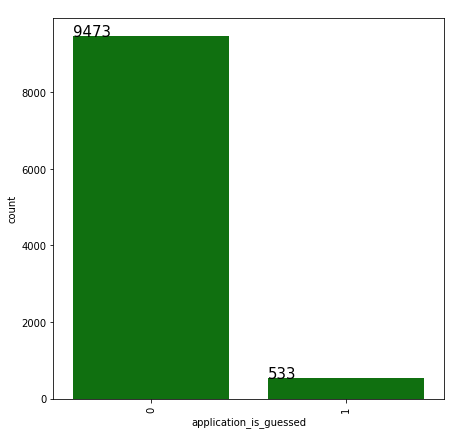

		application_confidence Distribution

+----+------------+------------------------------+
|    |   Category |   application_confidencePerc |
|----+------------+------------------------------|
|  0 |          0 |                        94.01 |
|  1 |          1 |                         5.33 |
|  2 |          4 |                         0.66 |
+----+------------+------------------------------+


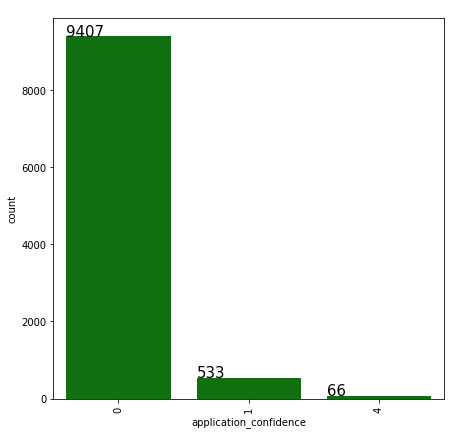

		label Distribution

+----+------------+-------------+
|    |   Category |   labelPerc |
|----+------------+-------------|
|  0 |          0 |       99.56 |
|  1 |          1 |        0.44 |
+----+------------+-------------+


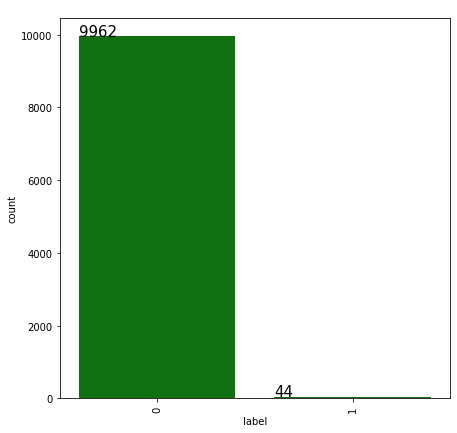

In [34]:
for col in cols:
  categroy_distribution(df,col, top = 10)

In [42]:
def pie_chart_distribution(data, cols):
    """
    In pie_chart_distribution function we are plotting the PIE chart of all categroical
    features.
    """
    plt.rcParams['font.size'] = 13
    for col in cols:
        print("="*50)
        print(f"\t Feature: {col}")
        print("="*50)
        final = (round(data[col].value_counts(normalize=True),3)*100).to_frame()
        print(tabulate(final, headers = 'keys', tablefmt = 'psql'))
        
        plt.figure(figsize=(7,8))
        data[col].value_counts().plot(kind='pie', autopct='%1.0f%%')
        plt.show()

	 Feature: protocol
+----+------------+
|    |   protocol |
|----+------------|
|  6 |       79.5 |
| 17 |       20.5 |
|  1 |        0   |
+----+------------+


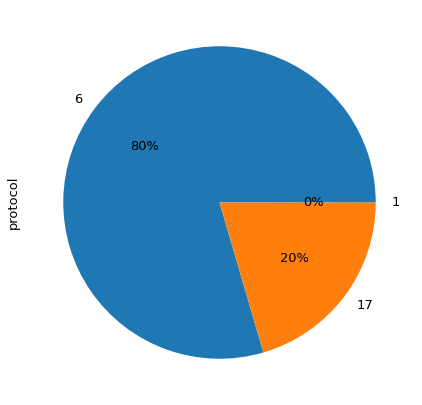

	 Feature: src2dst_ack_packets
+----+-----------------------+
|    |   src2dst_ack_packets |
|----+-----------------------|
|  0 |                  99.3 |
|  4 |                   0.4 |
|  2 |                   0.3 |
+----+-----------------------+


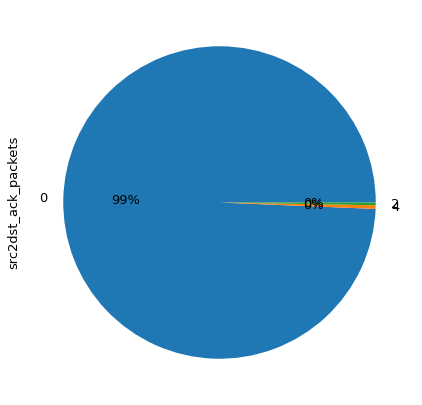

	 Feature: src2dst_psh_packets
+----+-----------------------+
|    |   src2dst_psh_packets |
|----+-----------------------|
|  0 |                   100 |
|  2 |                     0 |
+----+-----------------------+


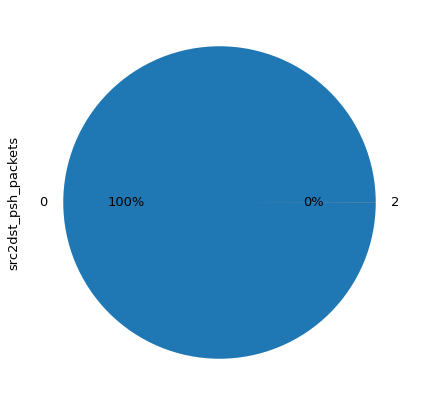

	 Feature: src2dst_rst_packets
+----+-----------------------+
|    |   src2dst_rst_packets |
|----+-----------------------|
|  0 |                  99.2 |
|  2 |                   0.8 |
+----+-----------------------+


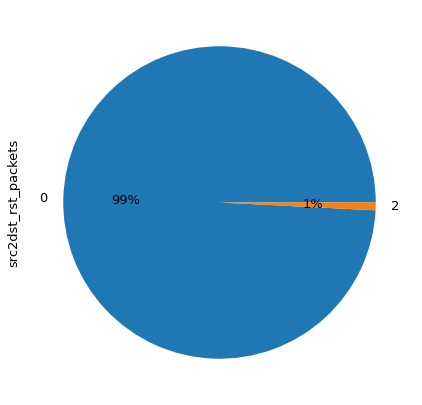

	 Feature: src2dst_fin_packets
+----+-----------------------+
|    |   src2dst_fin_packets |
|----+-----------------------|
|  0 |                   100 |
+----+-----------------------+


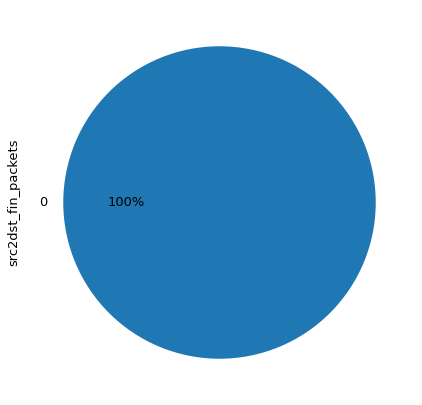

	 Feature: dst2src_syn_packets
+----+-----------------------+
|    |   dst2src_syn_packets |
|----+-----------------------|
|  0 |                  98.9 |
|  2 |                   1.1 |
+----+-----------------------+


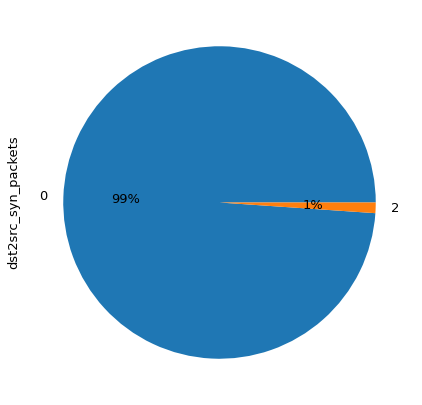

	 Feature: dst2src_cwr_packets
+----+-----------------------+
|    |   dst2src_cwr_packets |
|----+-----------------------|
|  0 |                   100 |
+----+-----------------------+


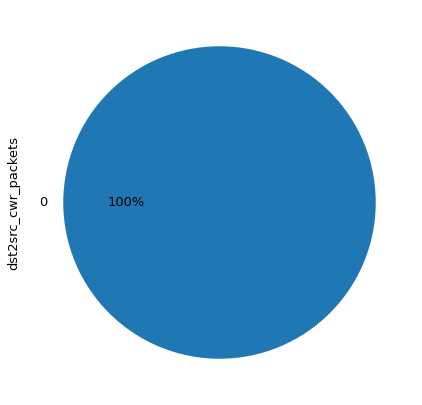

	 Feature: dst2src_ece_packets
+----+-----------------------+
|    |   dst2src_ece_packets |
|----+-----------------------|
|  0 |                   100 |
|  2 |                     0 |
+----+-----------------------+


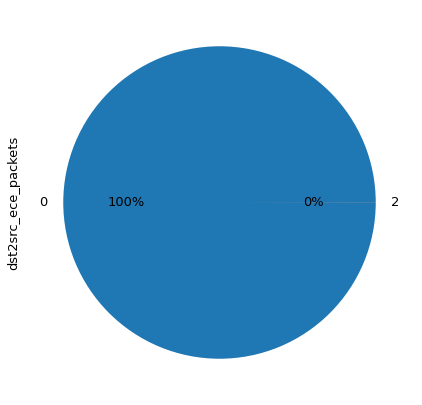

	 Feature: dst2src_urg_packets
+----+-----------------------+
|    |   dst2src_urg_packets |
|----+-----------------------|
|  0 |                   100 |
+----+-----------------------+


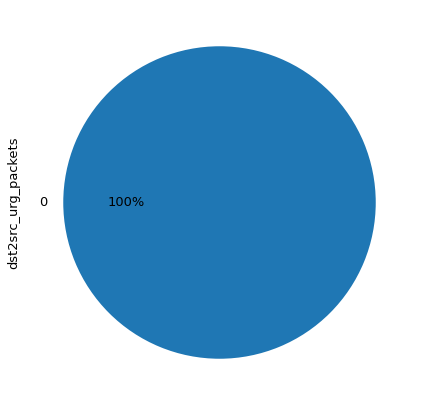

	 Feature: dst2src_ack_packets
+----+-----------------------+
|    |   dst2src_ack_packets |
|----+-----------------------|
|  0 |                  99.1 |
|  2 |                   0.8 |
|  4 |                   0.1 |
+----+-----------------------+


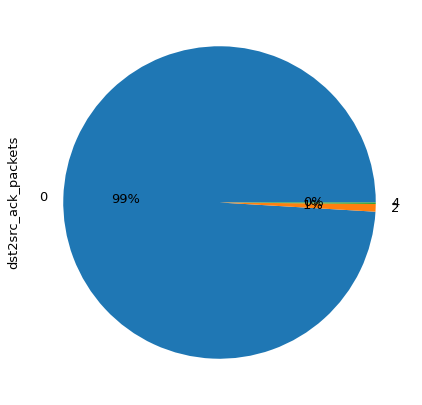

	 Feature: dst2src_psh_packets
+----+-----------------------+
|    |   dst2src_psh_packets |
|----+-----------------------|
|  0 |                   100 |
|  2 |                     0 |
+----+-----------------------+


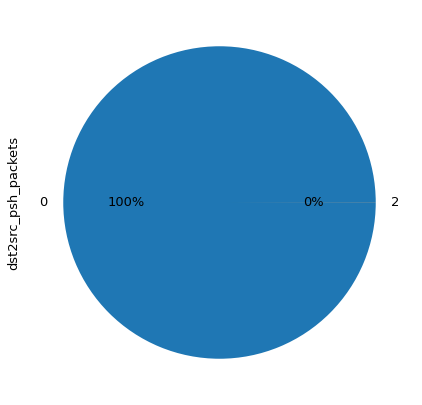

	 Feature: dst2src_rst_packets
+----+-----------------------+
|    |   dst2src_rst_packets |
|----+-----------------------|
|  0 |                  99.7 |
|  2 |                   0.3 |
+----+-----------------------+


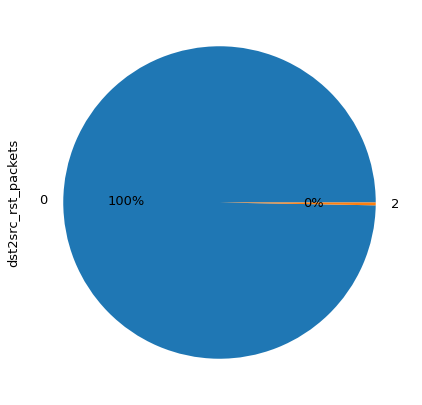

	 Feature: dst2src_fin_packets
+----+-----------------------+
|    |   dst2src_fin_packets |
|----+-----------------------|
|  0 |                   100 |
+----+-----------------------+


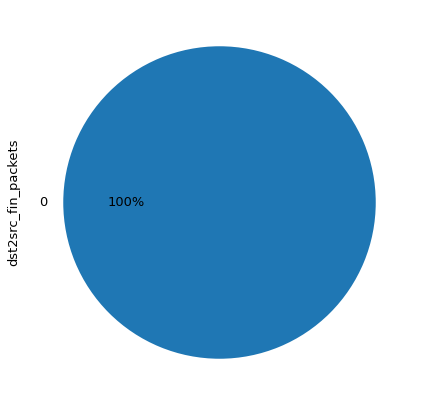

	 Feature: application_name
+--------------------+--------------------+
|                    |   application_name |
|--------------------+--------------------|
| Unknown            |               94   |
| DNS                |                0.5 |
| VNC                |                0.2 |
| HTTP               |                0.2 |
| SIP                |                0.2 |
| CiscoVPN           |                0.2 |
| SMTPS              |                0.2 |
| AJP                |                0.2 |
| Whois-DAS          |                0.2 |
| BGP                |                0.2 |
| MsSQL-TDS          |                0.2 |
| HTTP_Proxy         |                0.2 |
| NetBIOS            |                0.2 |
| H323               |                0.2 |
| IPsec              |                0.1 |
| VMware             |                0.1 |
| Radius             |                0.1 |
| RDP                |                0.1 |
| SOCKS              |                0.1 |
| Sy

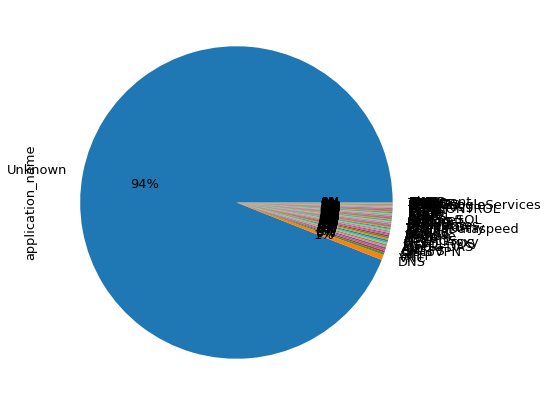

	 Feature: application_category_name
+---------------+-----------------------------+
|               |   application_category_name |
|---------------+-----------------------------|
| Unspecified   |                        94   |
| Network       |                         1.5 |
| Web           |                         0.8 |
| RemoteAccess  |                         0.6 |
| Email         |                         0.6 |
| VoIP          |                         0.4 |
| Database      |                         0.4 |
| System        |                         0.4 |
| VPN           |                         0.3 |
| DataTransfer  |                         0.3 |
| Download      |                         0.2 |
| Media         |                         0.2 |
| Collaborative |                         0.2 |
| Game          |                         0.1 |
| Mining        |                         0.1 |
| IoT-Scada     |                         0.1 |
| RPC           |                         0   |
+--

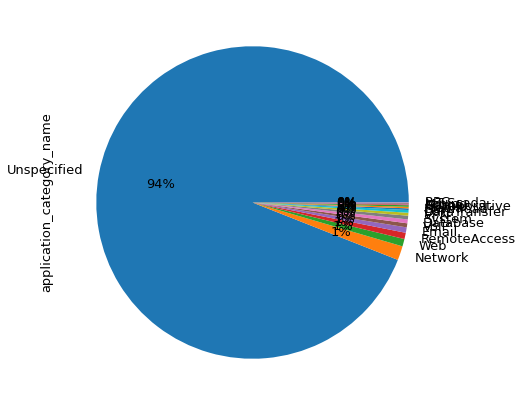

	 Feature: application_is_guessed
+----+--------------------------+
|    |   application_is_guessed |
|----+--------------------------|
|  0 |                     94.7 |
|  1 |                      5.3 |
+----+--------------------------+


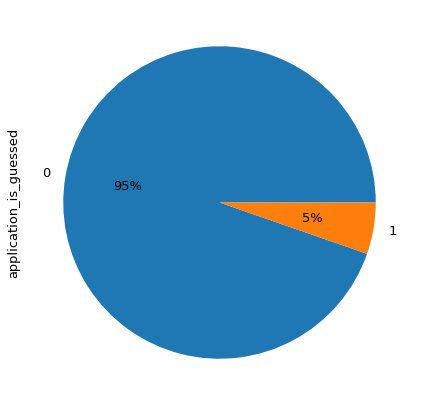

	 Feature: application_confidence
+----+--------------------------+
|    |   application_confidence |
|----+--------------------------|
|  0 |                     94   |
|  1 |                      5.3 |
|  4 |                      0.7 |
+----+--------------------------+


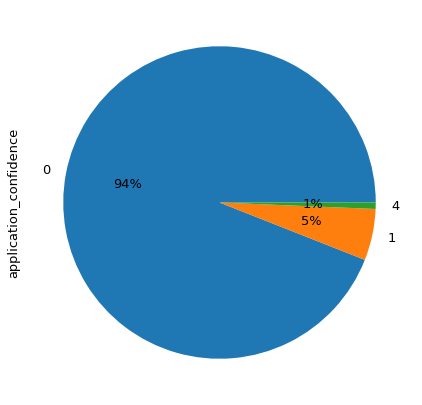

	 Feature: label
+----+---------+
|    |   label |
|----+---------|
|  0 |    99.6 |
|  1 |     0.4 |
+----+---------+


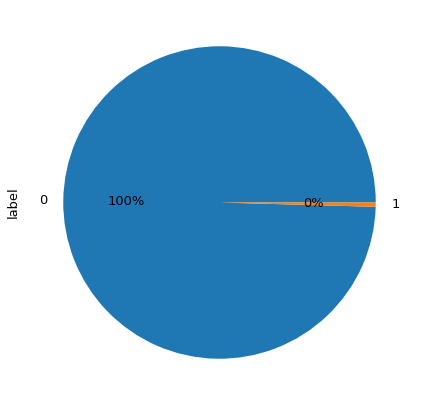

In [43]:
pie_chart_distribution(df,cols)

In [44]:
def drop_high_categrocal_features(df):
  # lets remove the features which has only one category value equal to 100% and missing value >=95%
  # because that are not good for model prediction
  stats = []
  for col in df.columns[:-1]:
      stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
  stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', '% MissingValues', '% highOneCategoricalValues', 'type'])
  df_ = stats_df.sort_values('% MissingValues', ascending=False)
  one_category_value = df_[(df_['% highOneCategoricalValues']==100) | (df_['% MissingValues']>=95)]
  print(tabulate(one_category_value, headers = 'keys', tablefmt = 'psql'))
  return one_category_value

In [45]:
one_category_value = drop_high_categrocal_features(df)

+----+---------------------------+-----------------+-------------------+------------------------------+---------+
|    | Feature                   |   Unique_values |   % MissingValues |   % highOneCategoricalValues | type    |
|----+---------------------------+-----------------+-------------------+------------------------------+---------|
| 78 | content_type              |               0 |          100      |                     100      | float64 |
| 77 | user_agent                |               0 |          100      |                     100      | float64 |
| 76 | server_fingerprint        |               0 |          100      |                     100      | float64 |
| 75 | client_fingerprint        |               0 |          100      |                     100      | float64 |
| 74 | requested_server_name     |               9 |           99.4903 |                      99.4903 | object  |
| 49 | bidirectional_urg_packets |               1 |            0      |                

In [46]:
drop_features = one_category_value['Feature'].tolist()
drop_features

['content_type',
 'user_agent',
 'server_fingerprint',
 'client_fingerprint',
 'requested_server_name',
 'bidirectional_urg_packets',
 'bidirectional_fin_packets',
 'src2dst_urg_packets',
 'dst2src_min_piat_ms',
 'dst2src_fin_packets',
 'dst2src_urg_packets',
 'dst2src_cwr_packets',
 'src2dst_fin_packets',
 'expiration_id',
 'tunnel_id',
 'vlan_id',
 'ip_version']

In [47]:
# lets drop the features
df = df.drop(drop_features, axis=1)

In [48]:
def remove_missing_values(df):
  # Replace Inf values with NaN if any
  df = df.replace([np.inf, -np.inf], np.nan)
  # lets try to check the total missing values in the dataset
  print("Total Missing Values : ", df.isnull().sum().sum())
  print("Missing Value feature: ", df.columns[df.isnull().any()])

  # lets drop the all null occurence
  df = df.dropna()

  # lets again check the missing values
  print("After Removing Total Missing Values : ", df.isnull().sum().sum())

  return df

In [49]:
df = remove_missing_values(df)

Total Missing Values :  0
Missing Value feature:  Index([], dtype='object')
After Removing Total Missing Values :  0


In [50]:
from sklearn.preprocessing import LabelEncoder
labelEnc = LabelEncoder()
for i in list(df.columns):
    if df[i].dtype == 'object':
        df[i] = labelEnc.fit_transform(df[i])

In [51]:
'''
The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types):
number of non-missing values, mean, standard deviation,range, median, 0.25 and 0.75 quartiles. 

'''
df.describe().T

,count,mean,std,min,25%,50%,75%,max
src_port,10006.0,4.520873e+04,6.840595e+03,0.000000e+00,4.061200e+04,4.091900e+04,5.078200e+04,6.098800e+04
dst_port,10006.0,1.163726e+04,1.564505e+04,0.000000e+00,1.174000e+03,5.060000e+03,1.610625e+04,6.538900e+04
protocol,10006.0,8.249850e+00,4.438073e+00,1.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,1.700000e+01
bidirectional_first_seen_ms,10006.0,1.635173e+12,4.691504e+05,1.635172e+12,1.635172e+12,1.635173e+12,1.635173e+12,1.635174e+12
bidirectional_last_seen_ms,10006.0,1.635173e+12,4.693164e+05,1.635172e+12,1.635172e+12,1.635173e+12,1.635173e+12,1.635174e+12
bidirectional_duration_ms,10006.0,2.433916e+02,1.645284e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.642011e+06
bidirectional_packets,10006.0,5.371777e+00,3.230249e+02,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.231400e+04
bidirectional_bytes,10006.0,4.650046e+02,3.166332e+04,1.200000e+02,1.240000e+02,1.240000e+02,1.480000e+02,3.167406e+06
src2dst_first_seen_ms,10006.0,1.635173e+12,4.691504e+05,1.635172e+12,1.635172e+12,1.635173e+12,1.635173e+12,1.635174e+12
src2dst_last_seen_ms,10006.0,1.635173e+12,4.693095e+05,1.635172e+12,1.635172e+12,1.635173e+12,1.635173e+12,1.635174e+12


In [52]:
import time

# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#import for preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler



# import methods for measuring accuracy, precision, recall etc
from sklearn.metrics import (
    accuracy_score, 
    precision_score,
    recall_score,
    roc_auc_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [53]:
# lets extract the dependent and independent features
X = df.drop('label', axis=1)
y = df['label']

In [54]:
# lets split the dataset stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [55]:
# lets try to check the shape of training and testing
print("training shape :",X_train.shape)
print("testing shape :", X_test.shape)

training shape : (8004, 62)
testing shape : (2002, 62)


In [56]:
'''
Feature scaling marks the end of the data preprocessing in Machine Learning. It is a method to standardize the independent variables of a dataset within a specific range.
In other words, feature scaling limits the range of variables so that you can compare them on common grounds.

'''

min_max_scaler = MinMaxScaler()

X_train_std = min_max_scaler.fit_transform(X_train)
X_test_std = min_max_scaler.transform(X_test)

In [57]:
X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns = X_train.columns)

# **Random Forest Model**

In [58]:
rf11 = RandomForestClassifier()
rf11.fit(X_train_std, y_train)
predictions = rf11.predict(X_test_std)

In [59]:
imp_dict = {attr: rf11.feature_importances_[i] for i, attr in enumerate(X_train_std.columns.tolist())}
features = {k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}
f = pd.DataFrame(features, index=['featues importance'])
f

,application_name,application_confidence,application_is_guessed,application_category_name,bidirectional_rst_packets,dst2src_syn_packets,dst_port,bidirectional_stddev_ps,bidirectional_ack_packets,dst2src_ack_packets,src2dst_stddev_ps,bidirectional_syn_packets,bidirectional_stddev_piat_ms,bidirectional_packets,src2dst_rst_packets,dst2src_last_seen_ms,dst2src_packets,bidirectional_max_piat_ms,dst2src_min_ps,dst2src_first_seen_ms,dst2src_bytes,dst2src_mean_ps,bidirectional_mean_piat_ms,src2dst_first_seen_ms,src2dst_stddev_piat_ms,src_port,bidirectional_bytes,bidirectional_first_seen_ms,src2dst_last_seen_ms,src2dst_ack_packets,dst2src_max_ps,bidirectional_last_seen_ms,src2dst_mean_piat_ms,src2dst_mean_ps,src2dst_max_piat_ms,bidirectional_mean_ps,dst2src_stddev_piat_ms,src2dst_bytes,src2dst_packets,dst2src_stddev_ps,src2dst_max_ps,bidirectional_duration_ms,bidirectional_max_ps,dst2src_rst_packets,src2dst_duration_ms,dst2src_max_piat_ms,dst2src_duration_ms,src2dst_min_piat_ms,bidirectional_min_ps,dst2src_mean_piat_ms,src2dst_min_ps,src2dst_syn_packets,src2dst_psh_packets,protocol,bidirectional_min_piat_ms,bidirectional_cwr_packets,bidirectional_ece_packets,bidirectional_psh_packets,src2dst_cwr_packets,src2dst_ece_packets,dst2src_ece_packets,dst2src_psh_packets
featues importance,0.153914,0.135003,0.109496,0.049277,0.04131,0.035473,0.035084,0.03331,0.03171,0.031224,0.027773,0.027753,0.024255,0.023528,0.0143,0.013946,0.013904,0.013475,0.012365,0.012007,0.011584,0.011336,0.011032,0.010441,0.010065,0.009325,0.009282,0.009008,0.008343,0.008007,0.006664,0.006277,0.006275,0.004827,0.004735,0.0045,0.00425,0.00326,0.003117,0.002808,0.002516,0.002121,0.002045,0.001949,0.001854,0.001531,0.000959,0.000753,0.000706,0.000607,0.000319,0.000256,0.000145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


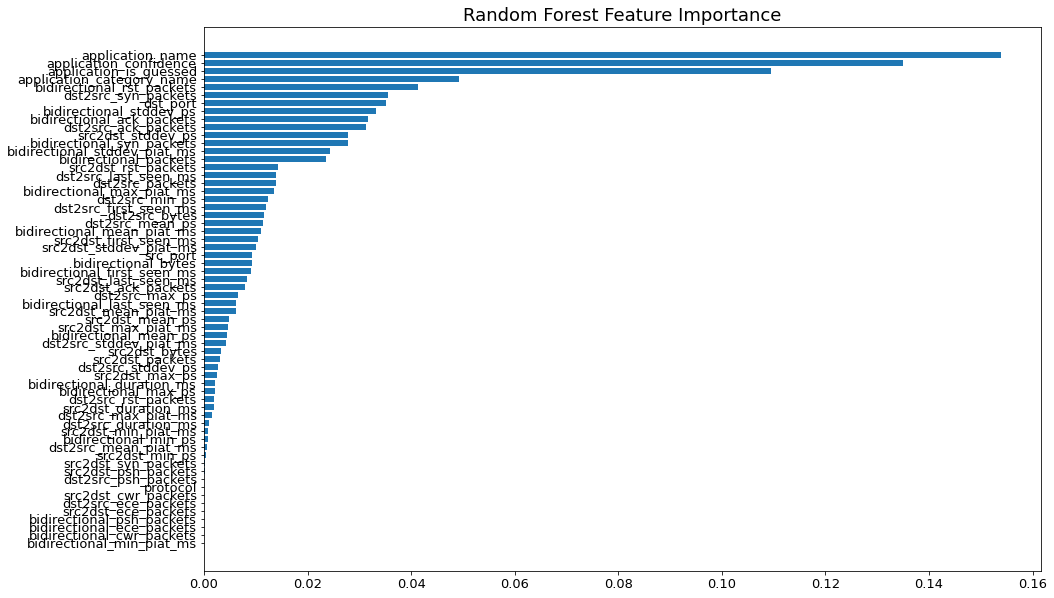

In [60]:
# let’s sort the features, and plot graph
plt.figure(figsize=(15,10))
sorted_idx = rf11.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf11.feature_importances_[sorted_idx])
plt.title("Random Forest Feature Importance", fontsize=18)
plt.show()

In [61]:
f.loc[:,:'bidirectional_max_piat_ms'].shape

(1, 18)

In [62]:
selected_f = f.loc[:,:'bidirectional_max_piat_ms'].columns.tolist()

X_train_rf_std = X_train_std[selected_f]
X_test_rf_std = X_test_std[selected_f]

In [63]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(model,predictions, y_test_set, x_val, model_name):    
    print("="*100)
    print("\t\t\t{}".format(model_name))
    print("="*100)

    # print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    # print ("Precision on validation set: {:.4f}".format(precision_score(y_test_set, predictions)))    
    # print ("Recall on validation set: {:.4f}".format(recall_score(y_test_set, predictions)))
    # print ("F1_Score on validation set: {:.4f}".format(f1_score(y_test_set, predictions)))
    
    y_score = model.predict_proba(x_val)
    fpr, tpr, th = roc_curve(y_test_set, y_score[:,1])

    roc_auc = auc(fpr, tpr)
    # print ("ROC_AUC on validation set: {:.4f}".format(roc_auc))
    
    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    
    print("="*30)
    print ("\tConfusion Matrix",)
    print("="*30)


    cm = confusion_matrix(y_test_set, predictions)
    print(cm)
    sns.set(font_scale=1)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum()) for item in cm.flatten()]

        ]
    ).reshape(2, 2)

    plt.figure(figsize=(8, 6))

    sns.heatmap(cm, annot=labels, fmt="", center=1)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    results = [accuracy_score(y_test_set, predictions),precision_score(y_test_set, predictions),
              recall_score(y_test_set, predictions),f1_score(y_test_set, predictions), roc_auc]
    return results

In [64]:
def model_training(model_object, X, y):
  print("Training ...")
  start_time = time.time()
  model = model_object
  %time model.fit(X, y)
  training_time = time.time() - start_time
  print("training time: ", training_time)
  print(" done.")
  return model

In [65]:
rf1 = RandomForestClassifier()
model = model_training(rf1, X_train_rf_std, y_train)

Training ...
CPU times: user 224 ms, sys: 1.45 ms, total: 226 ms
Wall time: 224 ms
training time:  0.22507238388061523
 done.


In [66]:
def model_predicting(model_objet, X):
  print("Predicting ...")
  s = time.time()
  y_pred = model_objet.predict(X)
  print("predicted time: ",time.time() - s)
  print('done')
  print()
  return y_pred

In [67]:
y_pred1 = model_predicting(model,X_test_rf_std)

Predicting ...
predicted time:  0.031658172607421875
done



			RandomForestClassifier()

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1993
           1       1.00      1.00      1.00         9

    accuracy                           1.00      2002
   macro avg       1.00      1.00      1.00      2002
weighted avg       1.00      1.00      1.00      2002

	Confusion Matrix
[[1993    0]
 [   0    9]]


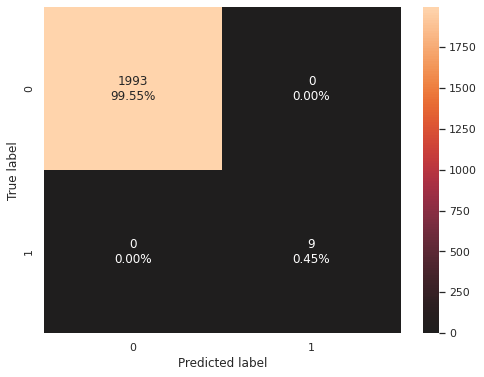

In [68]:
results_lr5 = modelEvaluation(model, y_pred1, y_test,X_test_rf_std, model)